# Mental Health in Tech: Predicting Treatment-Seeking Behavior

## First Notebook : Introduction

Mental health is a growing concern in the technology industry, where demanding workloads, remote work, and constant innovation pressures can affect employee well-being. Despite increasing awareness, many professionals still hesitate to seek help when experiencing mental health challenges.

This project, developed as part of the *Supervised Machine Learning* module of the IBM Machine Learning Professional Certificate, uses the **Mental Health in Tech Survey** dataset from Kaggle. The analysis applies multiple classification models to predict whether employees are likely to seek mental health treatment and to identify the factors most associated with that decision.

The insights derived from this analysis could help **Human Resources and organizational leaders** better understand the conditions that encourage or discourage employees from seeking help. Such knowledge can guide the creation of **data-informed wellness initiatives**, improve workplace culture, and support policies that promote long-term employee mental health and retention.

**Author:** J-F Jutras  
**Date:** July-August 2025  
**Dataset:** [Mental Health in Tech Survey (Kaggle)](https://www.kaggle.com/datasets) 



## 1.1-Data Loading and Overview

The dataset is retrieved directly from Kaggle using the `kagglehub` library. This ensures the analysis remains reproducible and uses the latest available version.



In [1]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

#Load dataset directly from Kaggle cache
df = pd.read_csv(f"{path}/survey.csv")

In [2]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.shape

(1259, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

The dataset contains 1,259 survey responses and 27 columns. Most columns are categorical (object type), except for Age which is numerical and Timestamp which is currently stored as a string. Some columns have missing values, particularly state, self_employed, work_interfere, and comments. These missing values should be taken into account in the analysis and later modeling steps.

## 1.2-Data Analysis

Before diving into the detailed exploration, the following steps outline our approach to analyzing the Mental Health in Tech Survey dataset:

1. **Target Variable Analysis**
   - Explore the distribution of the target variable `treatment`.
   - Identify potential class imbalance that may impact classification models.

---

2. **Numerical Variables**
   - Summarize numerical columns such as `Age`.
   - Visualize distributions and detect potential outliers.

---

3. **Categorical and Ordinal Variables**
   - Examine frequencies and proportions for all categorical and ordinal variables.
   - Explore relationships with the target variable using crosstabs and grouped visualizations.

---

4. **Missing Data Analysis**
   - Identify columns with missing values.
   - Determine potential strategies for handling missing data in future steps.

---

5. **Comments Analysis**
   - Explore the free-text column.
   - Preview a few examples to get a sense of content and potential patterns.

treatment
Yes    637
No     622
Name: count, dtype: int64 

treatment
Yes    0.506
No     0.494
Name: proportion, dtype: float64 



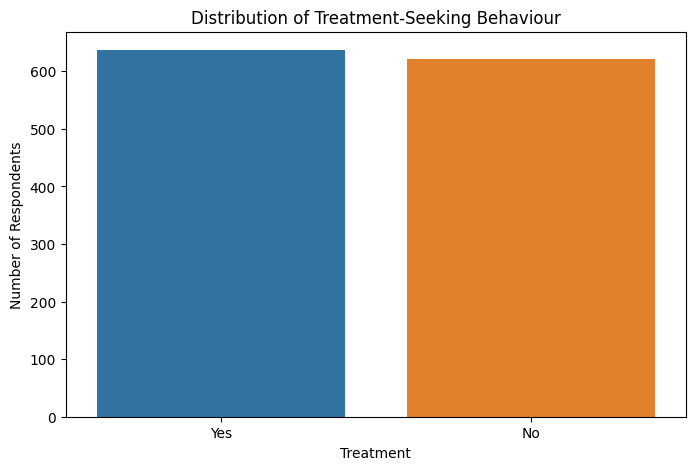

In [5]:
#1-TARGET VARIABLE ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

#Count occurences of each class
treatment_counts = df['treatment'].value_counts()
print(treatment_counts, "\n")

#Proportion of each class
print(round(df['treatment'].value_counts(normalize = True), 3), "\n")

#Visualize the distribution with a barplot
plt.figure(figsize = (8, 5))
sns.countplot(x = 'treatment', data = df)
plt.title("Distribution of Treatment-Seeking Behaviour")
plt.xlabel("Treatment")
plt.ylabel("Number of Respondents")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


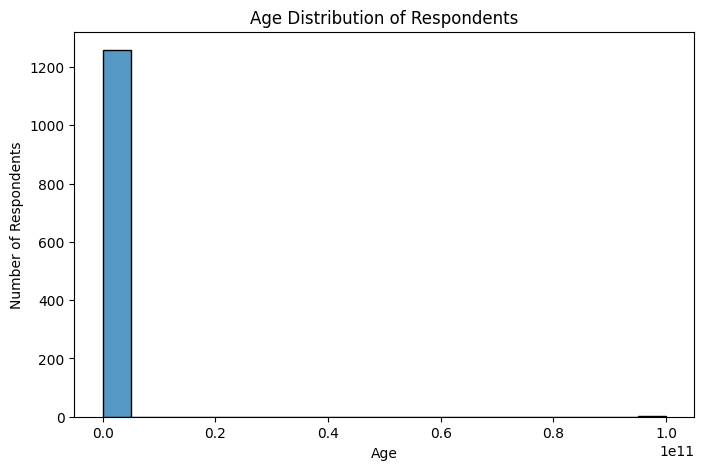

In [6]:
#2-NUMERICAL VARIABLE ANALYSIS

#Histogram of Age
plt.figure(figsize = (8, 5))
sns.histplot(df['Age'], bins = 20)
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.show()

The `Age` column contains extreme and implausible values (very large numbers) likely due to data entry errors. For this exploratory step, let's use a boxplot limited to plausible human ages (0–100) to better visualize the distribution. The boxplot highlights the median, quartiles, and extreme values, allowing us to identify unusual entries while postponing full data cleaning to a later stage.



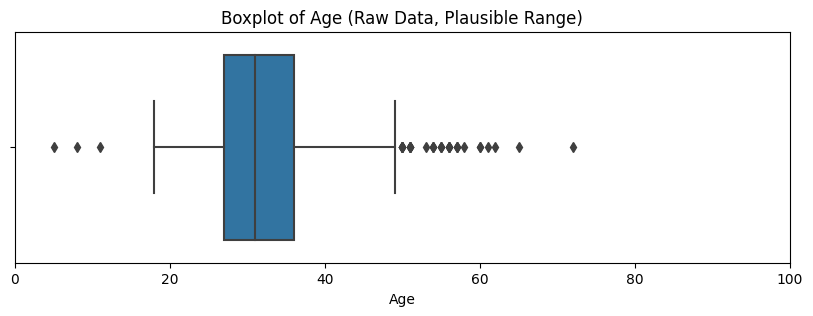

In [7]:
# Boxplot of Age (raw data, limited to plausible human ages)
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['Age'])
plt.xlim(0, 100)  # Focus on plausible ages
plt.title("Boxplot of Age (Raw Data, Plausible Range)")
plt.xlabel("Age")
plt.show()

In [8]:
#3-CATEGORICAL AND ORDINAL VARIABLES

#We will first examine the overall distribution of each variable using bar plots, 
#then investigate potential relationships with the target variable using grouped bar plots.
#This approach helps identify patterns, dominant categories, and possible associations 
#that can inform later modeling and feature selection.

#List of chosen key categorical variables
cat_vars = [
    'Gender', 'self_employed', 'family_history', 'work_interfere',
    'tech_company', 'benefits', 'care_options', 'wellness_program',
    'seek_help', 'anonymity', 'mental_health_consequence',
    'phys_health_consequence'
]

#Display unique categories for each variable
for var in cat_vars:
    print(f"{var}:")
    print(df[var].unique(), "\n")

Gender:
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means'] 

self_employed:
[nan 'Yes' 'No'] 

family_history:
['No' 'Yes'] 

work_interfere:
['Often' 'Rarely' 'Never' 'Sometimes' nan] 

tech_company:
['Yes' 'No'] 

benefits:
['Yes' "Don't know" 'No'] 

care_options:
['Not sure' 'No' 'Yes'] 

wellness_program:
['No' "Don't know" 'Yes'] 

seek_help:
['Yes' "Don't know" 'No'] 

anonymity:
['Yes' "Don't know" 'No'] 

mental_health_consequence:
['No' 'Maybe' 'Yes'] 

phys_health_consequence:


In [9]:
#Gender frequency table
gender_counts = df['Gender'].value_counts()
gender_props = df['Gender'].value_counts(normalize = True)
print(gender_counts, "\n")
print(gender_props)

Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

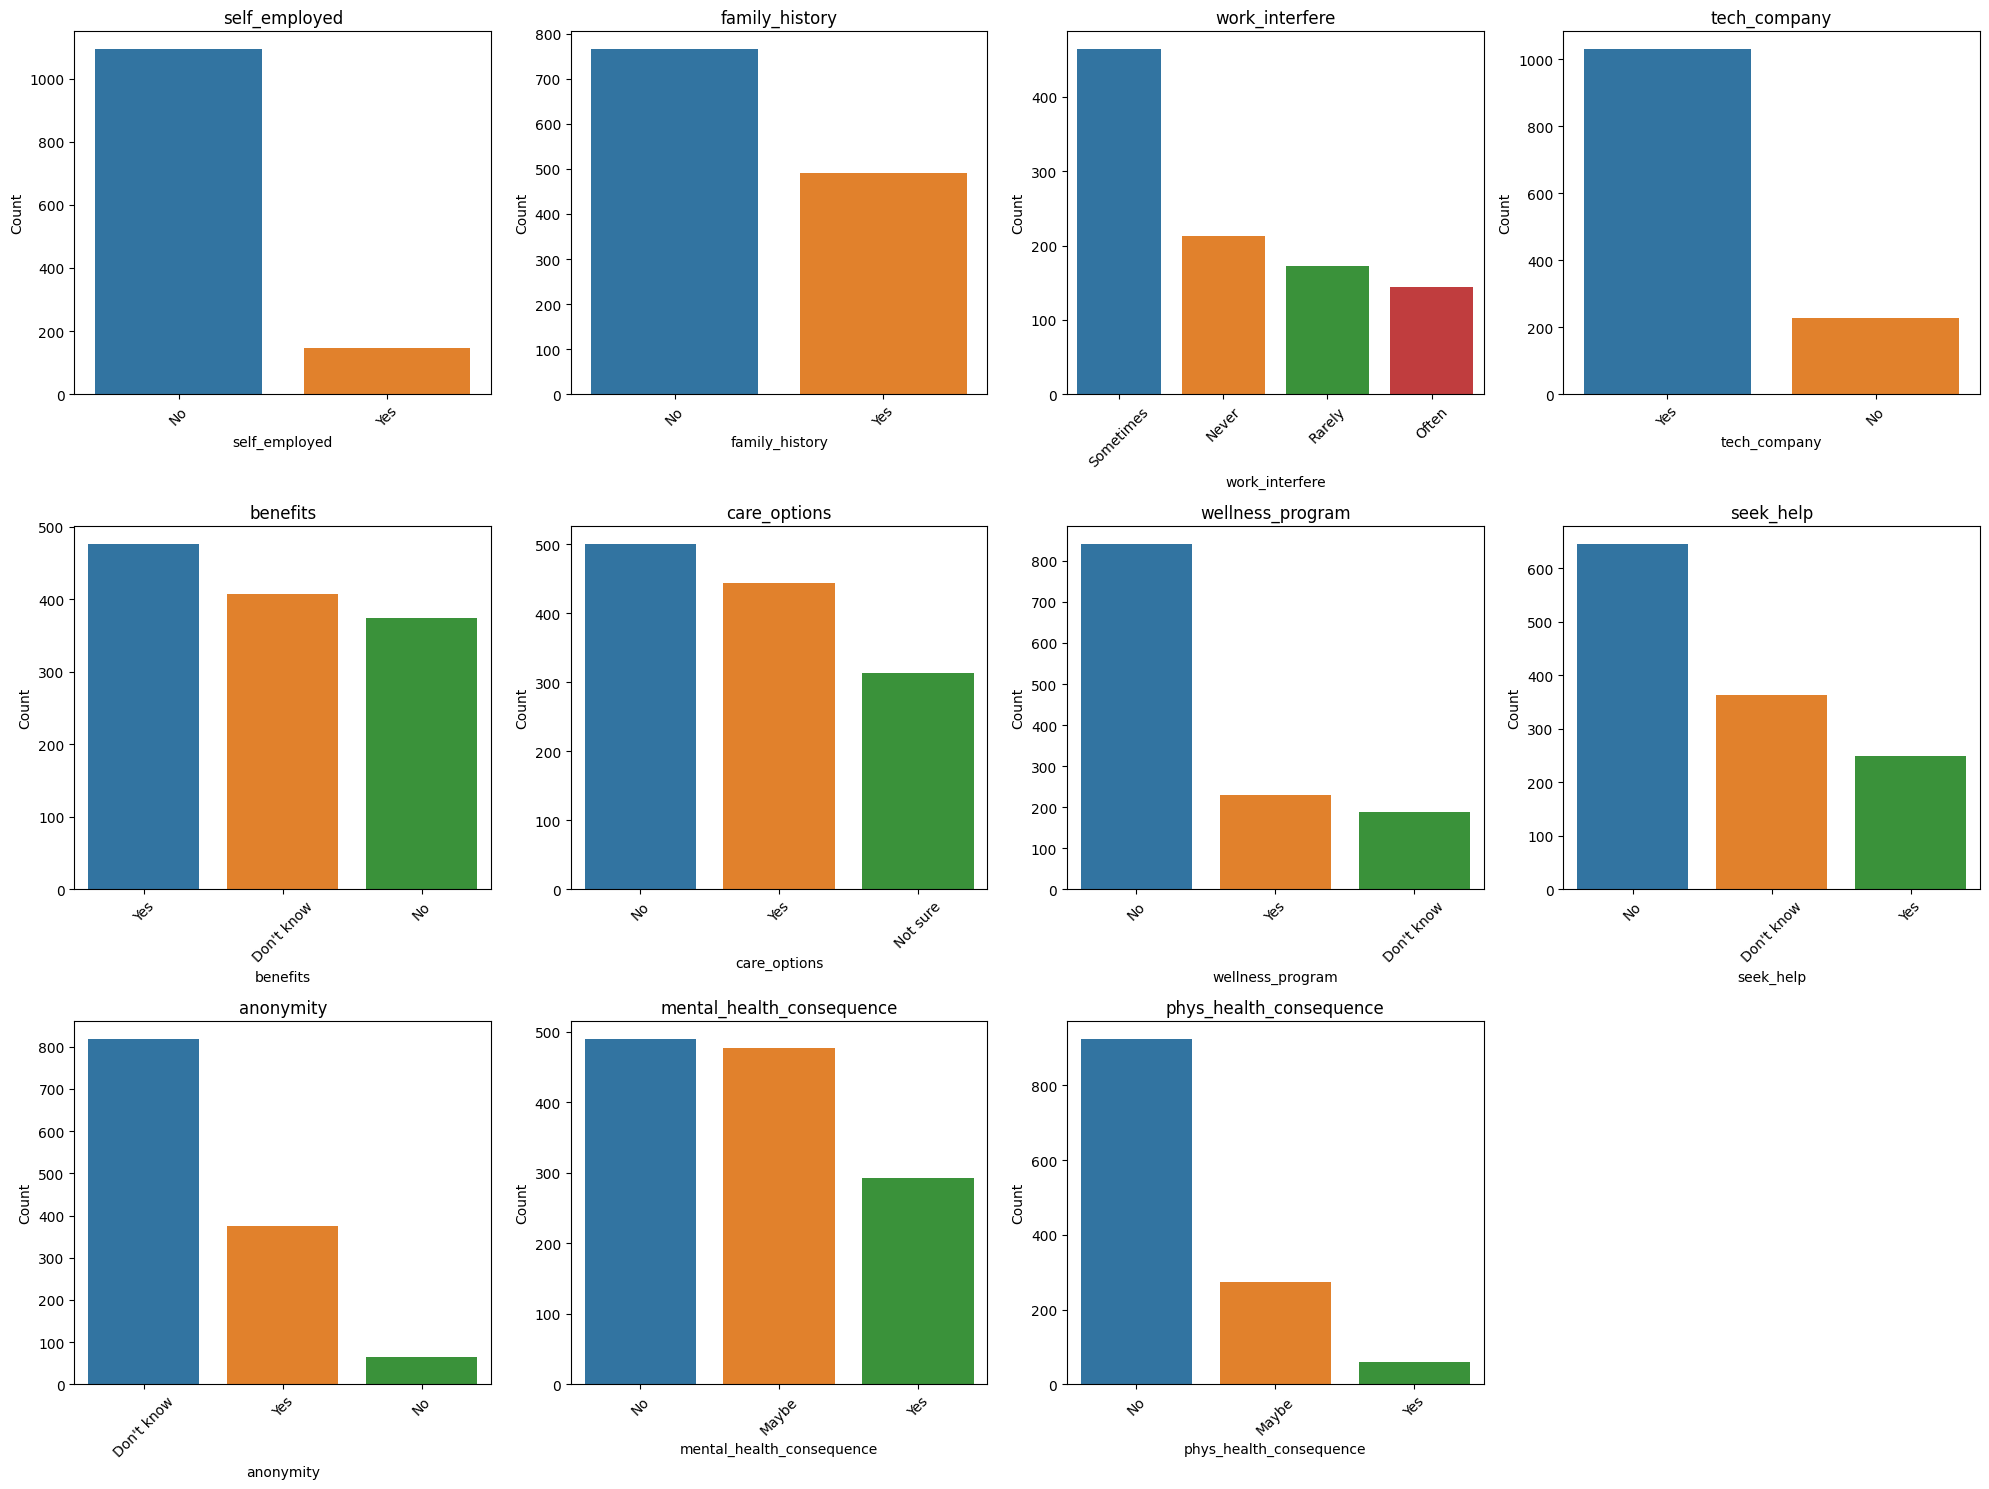

In [10]:
#List of categorical variables (excluding Gender)
other_cat_vars = [
    'self_employed', 'family_history', 'work_interfere',
    'tech_company', 'benefits', 'care_options', 'wellness_program',
    'seek_help', 'anonymity', 'mental_health_consequence',
    'phys_health_consequence'
]

#Define number of columns in the grid
cols = 4
rows = (len(other_cat_vars) + cols - 1) // cols  #Automatic rows

#Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
axes = axes.flatten()  #Flatten to 1D array for easy iteration

#Loop through variables and axes to plot individually
for ax, var in zip(axes, other_cat_vars):
    sns.countplot(x = var, data = df, order = df[var].value_counts().index, ax = ax)
    ax.set_title(var)
    ax.set_ylabel("Count")
    ax.tick_params(axis = 'x', rotation = 45)

#Remove empty axes if any
for i in range(len(other_cat_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

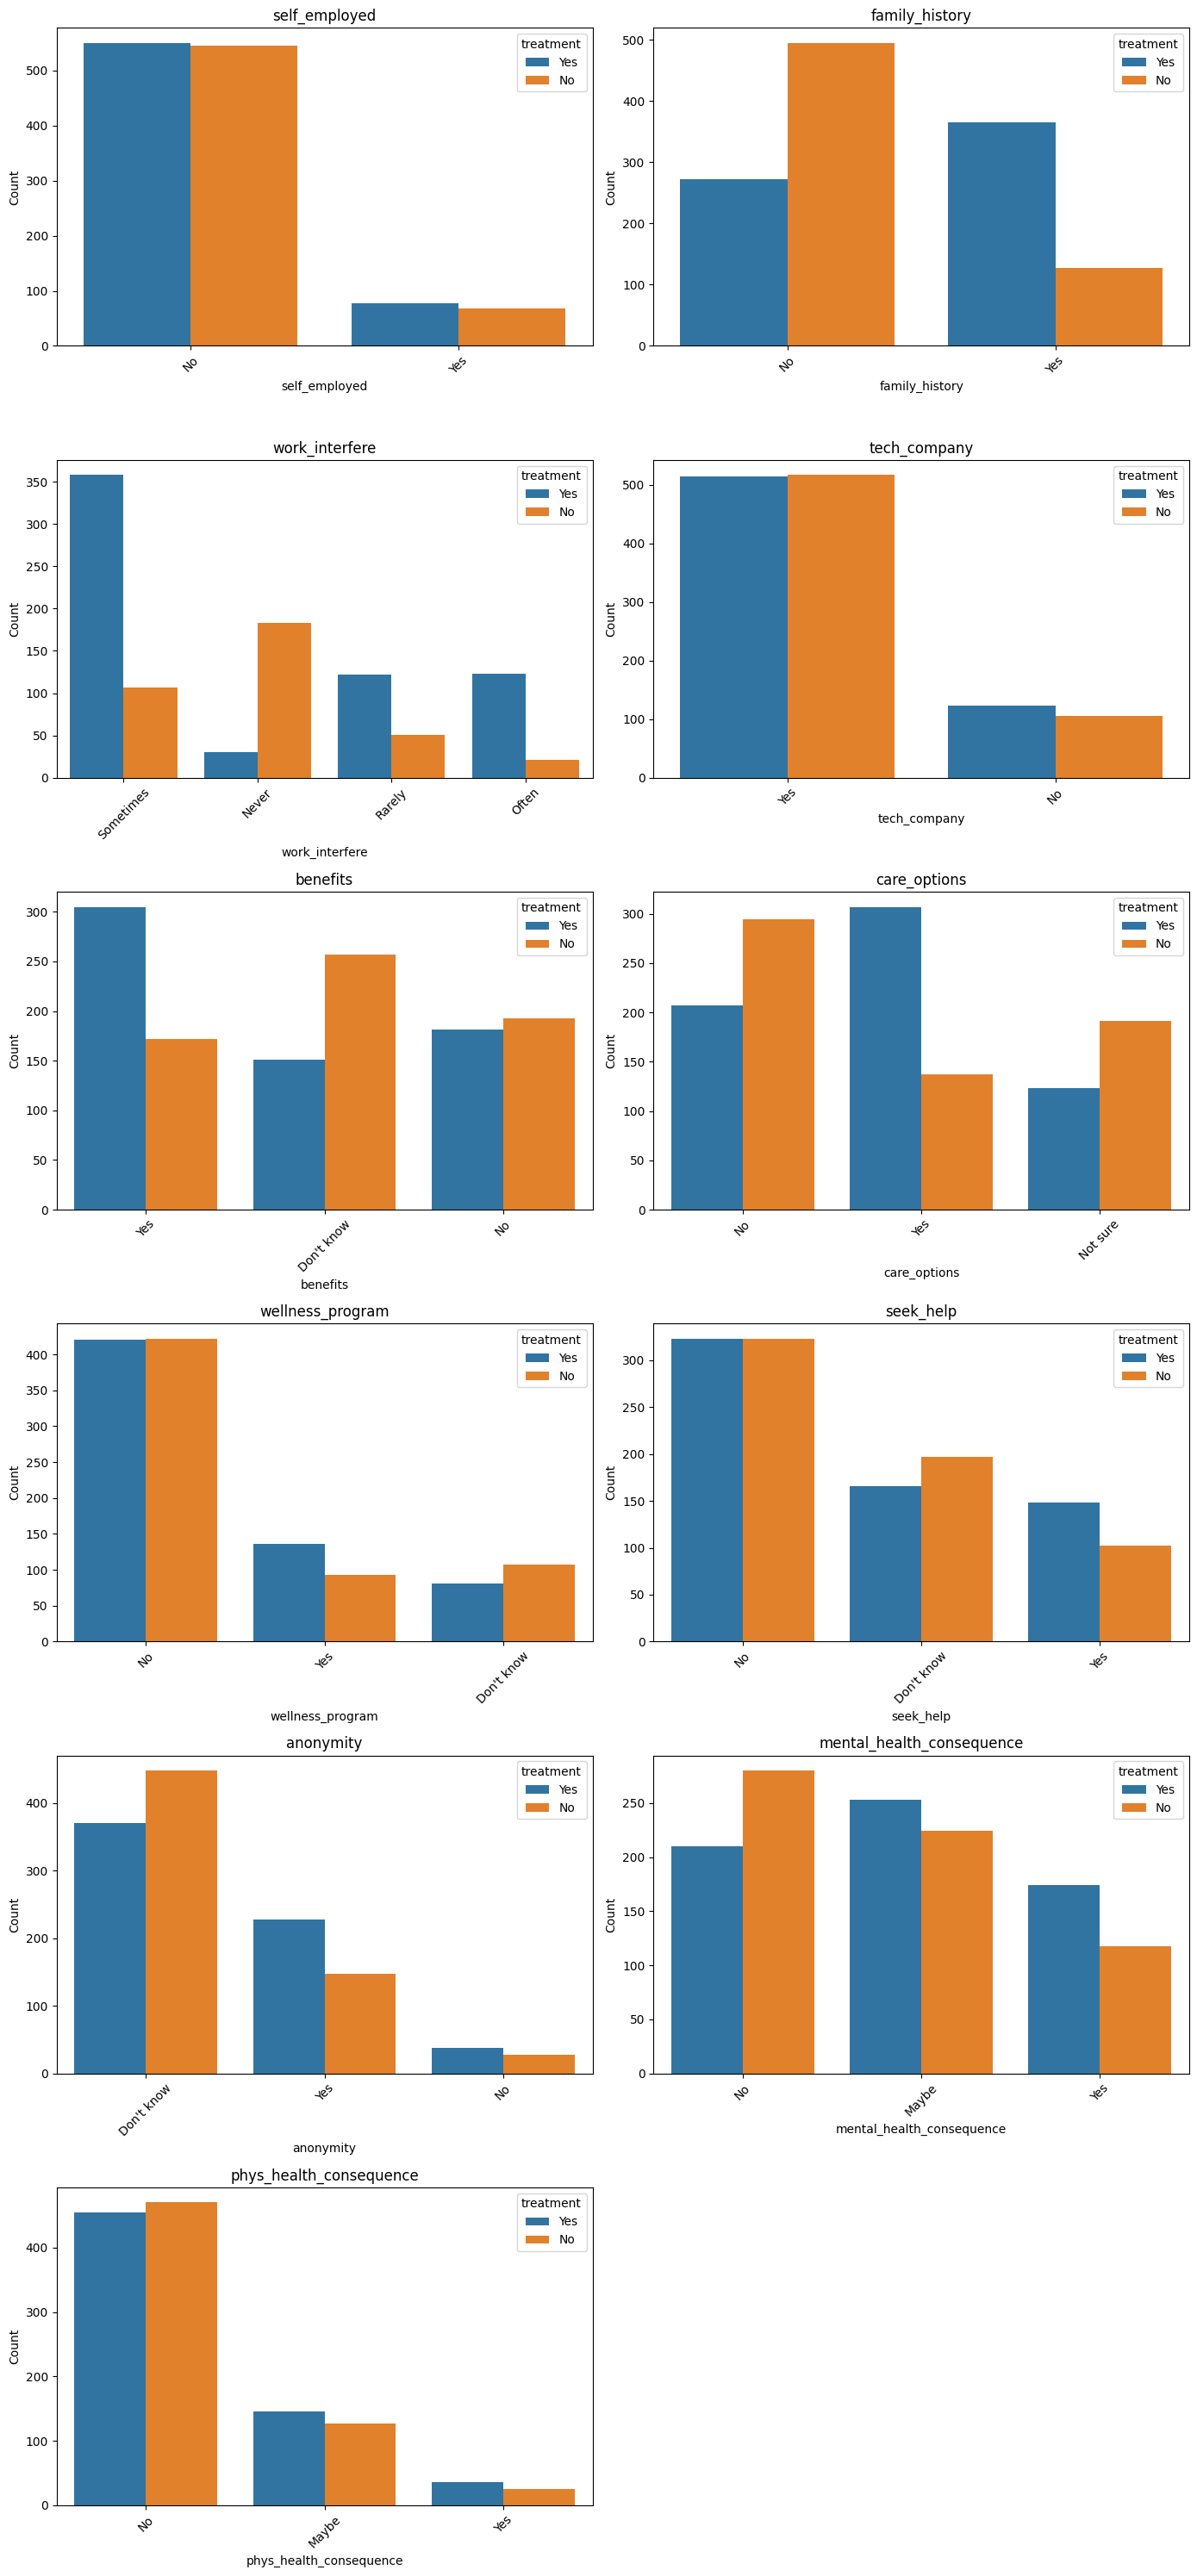

In [11]:
#Distribution against the target
cols = 2
rows = (len(other_cat_vars) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
axes = axes.flatten()

for ax, var in zip(axes, other_cat_vars):
    sns.countplot(x=var, hue='treatment', data=df,
                  order=df[var].value_counts().index, ax=ax)
    ax.set_title(var)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

#Remove any empty axes
for i in range(len(other_cat_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [12]:
#4-MISSING DATA ANALYSIS

#Count missing values per column
missing_counts = df.isnull().sum()
print(missing_counts)

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [13]:
#5-COMMENTS ANALYSIS

#Check basic statistics : length of comments
df['comment_length'] = df['comments'].dropna().apply(len)
print(df['comment_length'].describe())

count     164.000000
mean      243.176829
std       331.820669
min         1.000000
25%        86.750000
50%       166.500000
75%       299.000000
max      3548.000000
Name: comment_length, dtype: float64


In [14]:
#Preview a few examples
print("Sample comments: ", "\n")
print(df['comments'].dropna().head(10))

Sample comments:  

13    I'm not on my company's health insurance which...
15    I have chronic low-level neurological issues t...
16    My company does provide healthcare but not to ...
24                  Relatively new job. Ask again later
25    Sometimes I think  about using drugs for my me...
33    I selected my current employer based on its po...
45    Our health plan has covered my psychotherapy a...
49    I just started a new job last week hence a lot...
59    In addition to my own mental health issues I'v...
66                      Thanks for doing this research.
Name: comments, dtype: object


## 1.3-Preliminary Insights

**Age:** Most respondents are between 20 and 50 years old, representing young to mid-career tech professionals.

**Treatment:** Respondents are roughly evenly split between seeking treatment (50.6%) and not (49.4%), which is favorable for supervised modeling.

**Gender:** Majority identify as male or female, though there are many diverse entries; further cleaning may be needed.

**Potential patterns with treatment:**
- **Family History:** May be associated with higher likelihood to seek treatment.
- **Work Interfere:** Those reporting frequent work interference appear more likely to seek help.
- **Benefits & Care Options:** Access might influence treatment-seeking behavior.
- **Anonymity:** Anonymous options could be related to seeking help.
- **Mental Health Consequences:** Awareness of consequences at work might affect treatment decisions.

**Comments:** Limited (164 responses) but could provide qualitative insights on motivations or barriers not captured in structured data.

